In [4]:
#Bibliotecas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [18]:
plt.style.use('ggplot')

In [8]:
#Importando os dados 

inicio = datetime.date(2018, 1, 1)
fim = datetime.date(2021, 12, 31)

In [92]:
empresa = yf.download('TOTS3.SA', start=inicio, end=fim)[['Close', 'Adj Close']]
empresa.head()

[*********************100%***********************]  1 of 1 completed


,Close,Adj Close
Date,,
2018-01-02,10.030941,9.676621
2018-01-03,10.243869,9.882029
2018-01-04,10.180656,9.821049
2018-01-05,10.400239,10.032875
2018-01-08,10.393585,10.026456


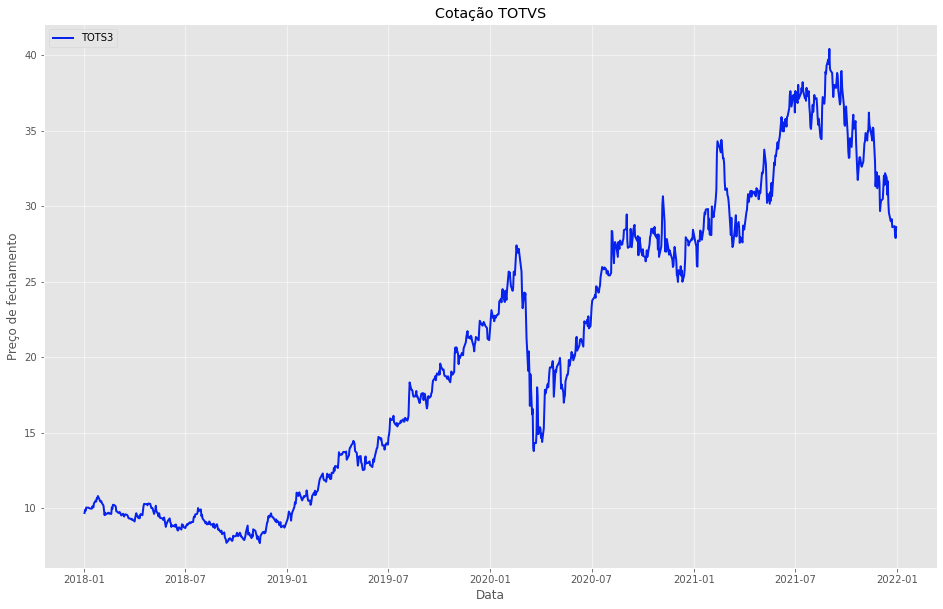

In [112]:
#Visualização

plt.figure(figsize=(16, 10));
x, = plt.plot(empresa['Adj Close'], color='#0722ed', label='TOTS3', linewidth=2);
plt.title('Cotação TOTVS');
plt.ylabel('Preço de fechamento');
plt.xlabel('Data');
plt.legend(loc=2);

In [94]:
#Craindo as médias

def media_movel(periodo_curta, periodo_longa):
    media = pd.DataFrame()
    media['Média curta'] = empresa['Adj Close'].rolling(window = periodo_curta).mean()
    media['Média longa'] = empresa['Adj Close'].rolling(window = periodo_longa).mean()
    return media

In [95]:
#Escolha dos períodos

periodo = media_movel(15, 30)
periodo

,Média curta,Média longa
Date,,
2018-01-02,NaN,NaN
2018-01-03,NaN,NaN
2018-01-04,NaN,NaN
2018-01-05,NaN,NaN
2018-01-08,NaN,NaN
...,...,...
2021-12-23,30.498023,31.712423
2021-12-27,30.385874,31.461911
2021-12-28,30.233244,31.221686


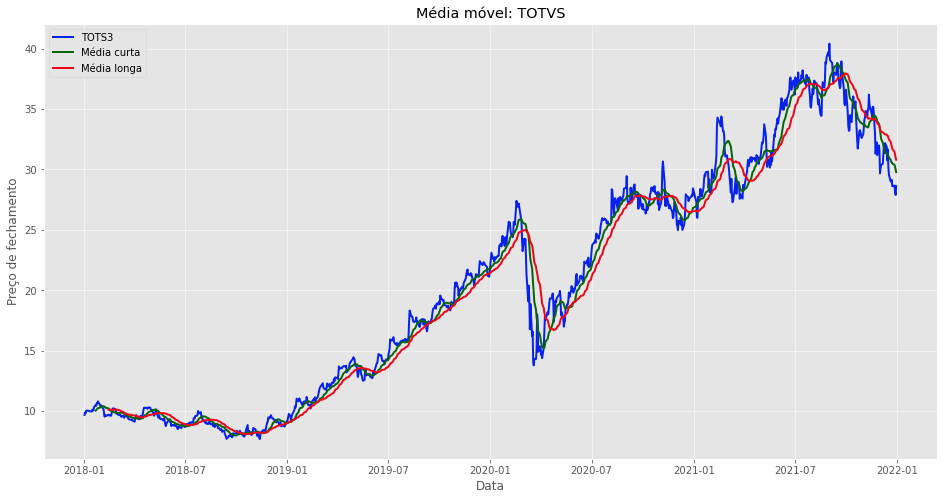

In [96]:
#Visualização

plt.figure(figsize=(16, 8));
x, = plt.plot(empresa['Adj Close'], color='#0722ed', label='TOTS3');
y, = plt.plot(periodo['Média curta'], color='#08660a', label='Média curta');
z, = plt.plot(periodo['Média longa'], color='#ed071a', label='Média longa');
plt.title('Média móvel: TOTVS');
plt.ylabel('Preço de fechamento');
plt.xlabel('Data');
plt.legend(loc=2);

In [97]:
#Criando a regra 

df_regra = pd.DataFrame()
df_regra['Fechamento ajustado'] = empresa['Adj Close']
df_regra['Média curta'] = periodo['Média curta']
df_regra['Média longa'] = periodo['Média longa']
df_regra

,Fechamento ajustado,Média curta,Média longa
Date,,,
2018-01-02,9.676621,NaN,NaN
2018-01-03,9.882029,NaN,NaN
2018-01-04,9.821049,NaN,NaN
2018-01-05,10.032875,NaN,NaN
2018-01-08,10.026456,NaN,NaN
...,...,...,...
2021-12-23,28.608072,30.498023,31.712423
2021-12-27,28.677750,30.385874,31.461911
2021-12-28,28.190001,30.233244,31.221686


In [98]:
#Criando sinais

def regra(base):
    preco_compra = []
    preco_venda = []
    aux = 1
    
    for i in range(len(base)):
        if base['Média curta'][i] > base['Média longa'][i]:
            if aux != 1:
                preco_compra.append(base['Fechamento ajustado'][i])
                preco_venda.append(np.nan)
                aux = 1
            else:
                preco_compra.append(np.nan)
                preco_venda.append(np.nan)
        elif base['Média curta'][i] < base['Média longa'][i]:
            if aux != 0:
                preco_compra.append(np.nan)
                preco_venda.append(base['Fechamento ajustado'][i])
                aux = 0
            else:
                preco_compra.append(np.nan)
                preco_venda.append(np.nan)
        else:
            preco_compra.append(np.nan)
            preco_venda.append(np.nan)
            
    return (preco_compra, preco_venda)

In [99]:
compra, venda = regra(df_regra)
sinal = pd.DataFrame()
sinal['Compra'] = compra
sinal['Venda'] = venda 
df_regra['Compra'] = compra
df_regra['Venda'] = venda

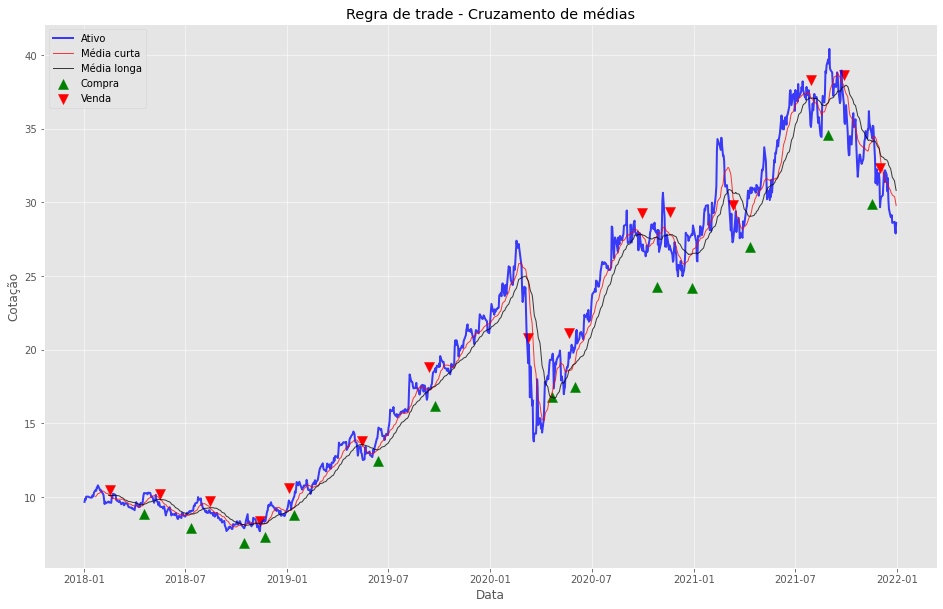

In [100]:
#Visualização dos cruzamentos

plt.figure(figsize=(16, 10));
plt.plot(df_regra['Fechamento ajustado'], label='Ativo', alpha=0.75, linewidth=2, color='blue');
plt.plot(df_regra['Média curta'], label='Média curta', alpha=0.75, linewidth=1, color='red');
plt.plot(df_regra['Média longa'], label='Média longa', alpha=0.75, linewidth=1, color='black');
plt.scatter(df_regra.index, df_regra['Compra']*0.87, label='Compra', marker='^', s=100, color='green');
plt.scatter(df_regra.index, df_regra['Venda']*1.09, label='Venda', marker='v', s=100, color='red');
plt.legend(loc=2);
plt.title('Regra de trade - Cruzamento de médias');
plt.xlabel('Data');
plt.ylabel('Cotação');

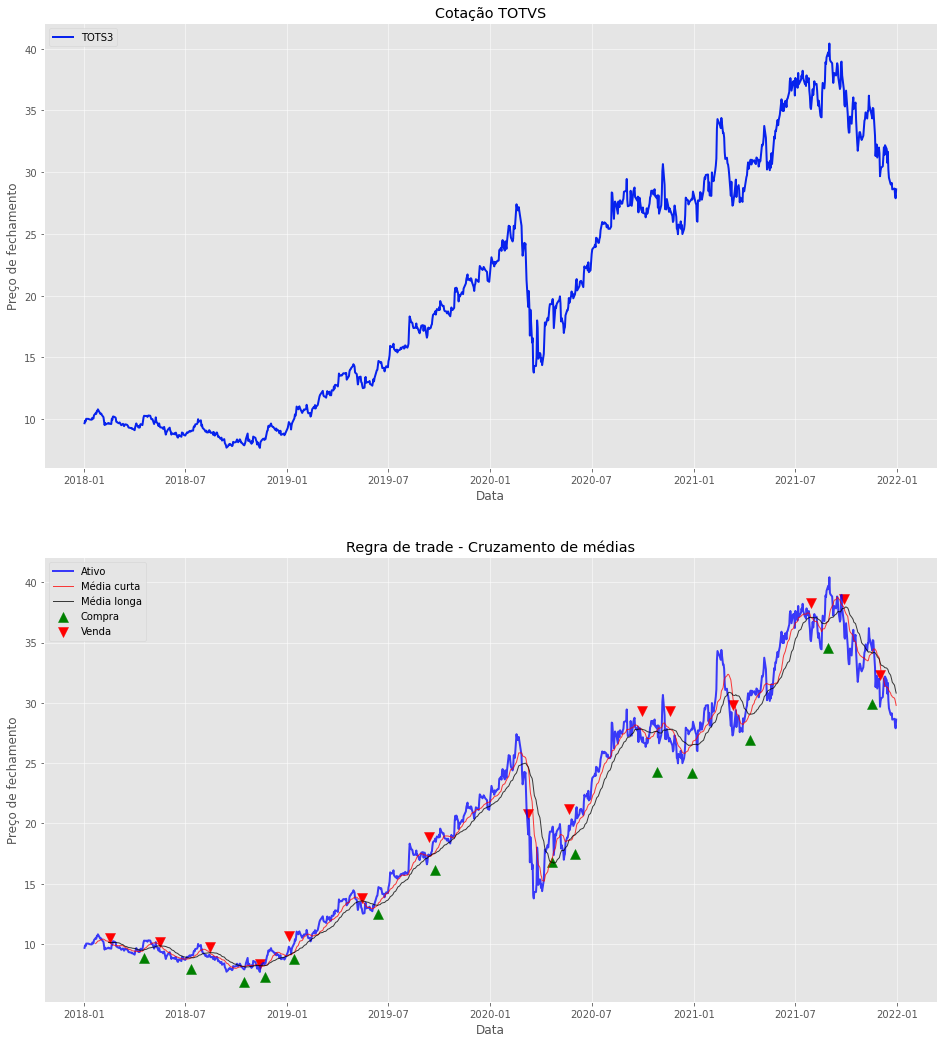

In [134]:
#Visualização completa

plt.figure(figsize=(16, 18));
plt.subplot(211);
plt.plot(empresa['Adj Close'], color='#0722ed', label='TOTS3', linewidth=2);
plt.title('Cotação TOTVS');
plt.ylabel('Preço de fechamento');
plt.xlabel('Data');
plt.legend(loc=2);

'''plt.subplot(222)
x, = plt.plot(empresa['Adj Close'], color='#0722ed', label='TOTS3');
y, = plt.plot(periodo['Média curta'], color='#08660a', label='Média curta');
z, = plt.plot(periodo['Média longa'], color='#ed071a', label='Média longa');
plt.title('Média móvel: TOTVS');
plt.ylabel('Preço de fechamento');
plt.xlabel('Data');
plt.legend(loc=2);'''

plt.subplot(212);
plt.plot(df_regra['Fechamento ajustado'], label='Ativo', alpha=0.75, linewidth=2, color='blue');
plt.plot(df_regra['Média curta'], label='Média curta', alpha=0.75, linewidth=1, color='red');
plt.plot(df_regra['Média longa'], label='Média longa', alpha=0.75, linewidth=1, color='black');
plt.scatter(df_regra.index, df_regra['Compra']*0.87, label='Compra', marker='^', s=100, color='green');
plt.scatter(df_regra.index, df_regra['Venda']*1.09, label='Venda', marker='v', s=100, color='red');
plt.legend(loc=2);
plt.title('Regra de trade - Cruzamento de médias');
plt.xlabel('Data');
plt.ylabel('Preço de fechamento');

In [101]:
df_compra = df_regra[~ df_regra['Compra'].isna()]
df_compra

,Fechamento ajustado,Média curta,Média longa,Compra,Venda
Date,,,,,
2018-04-18,10.140351,9.495539,9.490759,10.140351,NaN
2018-07-13,9.076835,8.864347,8.859527,9.076835,NaN
2018-10-15,7.908920,8.136645,8.135459,7.908920,NaN
2018-11-23,8.377955,8.217729,8.212661,8.377955,NaN
2019-01-14,10.079942,9.301260,9.294950,10.079942,NaN
2019-06-13,14.344158,13.282784,13.203158,14.344158,NaN
2019-09-23,18.591648,17.531382,17.491480,18.591648,NaN
2020-04-20,19.316004,16.952395,16.771300,19.316004,NaN
2020-06-01,20.113428,19.102509,19.036752,20.113428,NaN


In [102]:
#Criando o vetor 

np.array(df_compra['Compra'])

array([10.1403513 ,  9.07683468,  7.90892029,  8.37795544, 10.07994175,
       14.34415817, 18.5916481 , 19.3160038 , 20.11342812, 27.89140701,
       27.78284836, 30.98094749, 39.70689011, 34.35158539])

In [103]:
df_venda = df_regra[~ df_regra['Venda'].isna()]
df_venda

,Fechamento ajustado,Média curta,Média longa,Compra,Venda
Date,,,,,
2018-02-16,9.644528,10.098350,10.114825,NaN,9.644528
2018-05-18,9.343516,9.818191,9.838433,NaN,9.343516
2018-08-16,8.940799,9.234106,9.282172,NaN,8.940799
2018-11-13,7.682488,8.175893,8.195517,NaN,7.682488
2019-01-04,9.771736,9.080532,9.090779,NaN,9.771736
2019-05-16,12.676687,13.553317,13.578808,NaN,12.676687
2019-09-13,17.296757,17.259139,17.275699,NaN,17.296757
2020-03-09,19.086910,24.629268,24.687524,NaN,19.086910
2020-05-22,19.414772,18.597377,18.660848,NaN,19.414772


In [104]:
np.array(df_venda['Venda'])

array([ 9.64452839,  9.34351635,  8.94079876,  7.68248796,  9.77173615,
       12.67668724, 17.29675674, 19.08691025, 19.41477203, 26.87520218,
       26.93439674, 27.38680077, 35.11214066, 35.43658066, 29.67316055])

In [105]:
df_compra.shape

(14, 5)

In [106]:
df_venda.shape

(15, 5)

In [108]:
np.array(df_venda['Venda'][:-1]) - np.array(df_compra['Compra'])

array([-0.49582291,  0.26668167,  1.03187847, -0.69546747, -0.3082056 ,
       -1.66747093, -1.29489136, -0.22909355, -0.69865608, -1.01620483,
       -0.84845161, -3.59414673, -4.59474945,  1.08499527])

In [109]:
resultado = round(sum(np.array(df_venda['Venda'][:-1]) - np.array(df_compra['Compra'])), 2)

In [111]:
print(f'Resultado por ação R$ {resultado}')

Resultado por ação R$ -13.06


SCRIPT FINALIZADO!